In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
application_train_data = pd.read_csv('application_train.csv', sep=',')
application_train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Cleaning dataset : Application_train.csv

### Size of dataset

In [3]:
application_train_data.shape

(307511, 122)

In [4]:
for index,column in enumerate(application_train_data.columns):
        print(index,column)  

0 SK_ID_CURR
1 TARGET
2 NAME_CONTRACT_TYPE
3 CODE_GENDER
4 FLAG_OWN_CAR
5 FLAG_OWN_REALTY
6 CNT_CHILDREN
7 AMT_INCOME_TOTAL
8 AMT_CREDIT
9 AMT_ANNUITY
10 AMT_GOODS_PRICE
11 NAME_TYPE_SUITE
12 NAME_INCOME_TYPE
13 NAME_EDUCATION_TYPE
14 NAME_FAMILY_STATUS
15 NAME_HOUSING_TYPE
16 REGION_POPULATION_RELATIVE
17 DAYS_BIRTH
18 DAYS_EMPLOYED
19 DAYS_REGISTRATION
20 DAYS_ID_PUBLISH
21 OWN_CAR_AGE
22 FLAG_MOBIL
23 FLAG_EMP_PHONE
24 FLAG_WORK_PHONE
25 FLAG_CONT_MOBILE
26 FLAG_PHONE
27 FLAG_EMAIL
28 OCCUPATION_TYPE
29 CNT_FAM_MEMBERS
30 REGION_RATING_CLIENT
31 REGION_RATING_CLIENT_W_CITY
32 WEEKDAY_APPR_PROCESS_START
33 HOUR_APPR_PROCESS_START
34 REG_REGION_NOT_LIVE_REGION
35 REG_REGION_NOT_WORK_REGION
36 LIVE_REGION_NOT_WORK_REGION
37 REG_CITY_NOT_LIVE_CITY
38 REG_CITY_NOT_WORK_CITY
39 LIVE_CITY_NOT_WORK_CITY
40 ORGANIZATION_TYPE
41 EXT_SOURCE_1
42 EXT_SOURCE_2
43 EXT_SOURCE_3
44 APARTMENTS_AVG
45 BASEMENTAREA_AVG
46 YEARS_BEGINEXPLUATATION_AVG
47 YEARS_BUILD_AVG
48 COMMONAREA_AVG
49 ELEVATORS_AV

### Deleting empty (or not filled enough) columns

In [5]:
def showMissingValues(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Percent of missing values per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Column with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Column with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Column', size=15, weight='bold')
    plt.ylabel('Percent of missing values', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

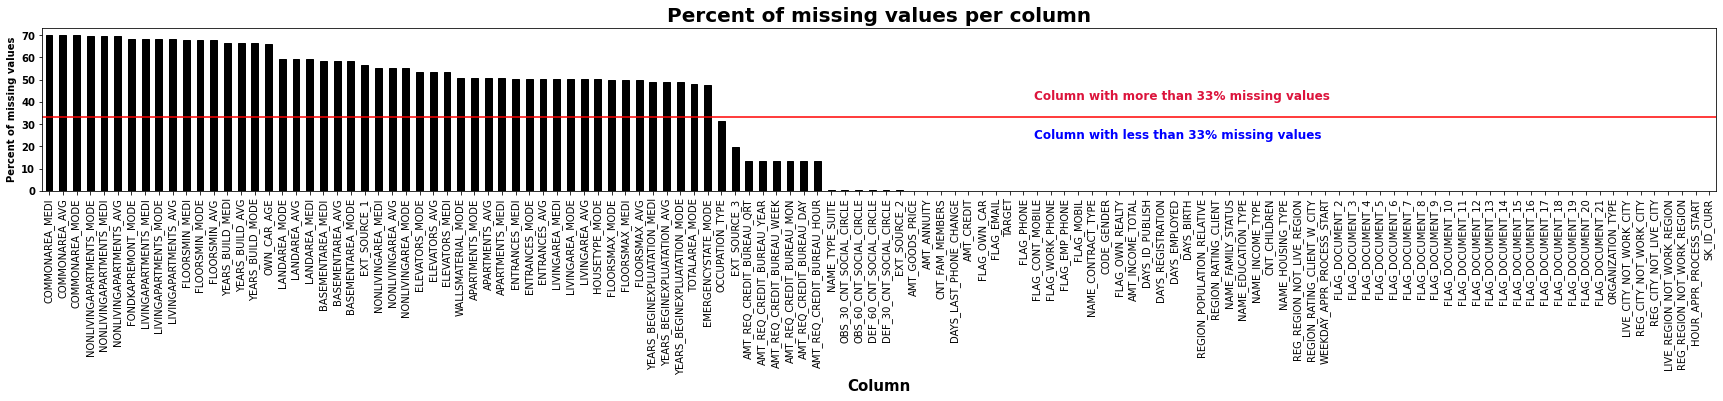

In [6]:
showMissingValues(application_train_data,33, width= 30)

In [7]:
application_train_data_filtered = application_train_data.copy()

for index,column in enumerate(application_train_data.columns):
        if(application_train_data[column].isnull().mean()*100 > 33):
            application_train_data_filtered = application_train_data_filtered.drop([column], axis=1)             

### Filling NaN with 0

In [27]:
application_train_data_filtered.fillna(0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,1,0,1754,1191,4588,189,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0,0,0,0,0,2064,4338,6985,704,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,1,1,1,1,0,338,228,662,30,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,0,0,1,0,1170,836,5680,145,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.000000,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,1,0,1,0,1019,1635,3960,352,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.000000,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0,0,1,0,0,0,1407,612,5217,80,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.000000,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,307507,0,0,0,0,1,0,387,672,1792,80,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,0,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.000000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,307508,0,0,0,0,1,0,1371,2270,5744,403,Unaccompanied,Working,Higher education,Separated,H

### Encoding labels into int

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
application_train_data_filtered = application_train_data_filtered.apply(lambda col: labelencoder.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [34]:
pd.set_option('display.max_columns', None)  
application_train_data_filtered

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,1,0,2372,1280,11099,593,6,7,4,3,1,60,7693,11195,14169,277,1,1,0,1,1,0,17,0,1,1,6,12,0,0,0,0,0,0,45,39871,209,4,3,4,2,569,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,208,3015,376,1229,1,4,1,1,1,3,13865,3238,6877,1251,1,1,0,1,1,0,12,16,0,0,1,17,0,0,0,0,0,0,33,103210,795,1,0,1,0,2871,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12352,0,1,1,1,1,0,907,474,13608,731,6,7,4,3,1,42,16400,6112,14926,784,1,1,1,1,1,0,17,0,1,1,1,16,0,0,0,0,0,0,3,89601,642,0,0,0,0,2855,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,135808,0,0,0,0,1,0,1024,4916,12447,540,6,7,4,0,1,28,16355,7086,6118,666,1,1,0,1,0,0,17,16,1,1,6,23,0,0,0,0,0,0,45,109299,795,4,0,4,0,2611,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,9,17,3,18
4,156498,0,0,1,0,1,0,1557,5280,10324,795,6,7,4,3,1,72,17384,7085,14988,1927,1,1,0,1,0,0,12,0,1,1,4,17,0,0,0,0,1,1,31,48701,795,0,0,0,0,225,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,145077,0,0,1,0,0,0,1944,4640,11877,68,6,7,4,2,5,75,7543,6248,4417,105,1,1,0,1,0,0,6,0,0,0,4,21,0,0,0,0,0,0,38,116295,795,0,0,0,0,1028,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,9,17,3,18
307507,145078,0,0,0,0,1,0,966,4714,7648,68,6,3,4,5,1,70,862,2862,15082,2708,1,0,0,1,1,0,10,0,1,1,1,15,0,0,0,0,0,0,53,17059,795,0,0,0,0,3082,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,9,9,17,3,18
307508,145079,0,0,0,0,1,0,1900,463,12526,858,6,7,1,2,1,8,11868,528,2296,4017,1,1,0,1,0,1,2,0,2,2,4,16,0,0,0,0,1,1,33,85619,294,22,0,22,0,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
307509,145080,1,0,0,0,1,0,2081,5126,9871,560,6,1,4,1,1,11,8530,9240,12829,5660,1,1,0,1,0,0,17,16,1,1,6,16,0,0,0,1,1,0,23,81458,593,0,0,0,0,1633,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### LR

In [36]:
from sklearn.model_selection import train_test_split

x = application_train_data_filtered.iloc[:,2:73]
y = application_train_data_filtered.iloc[:,1] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')

lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [44]:
from sklearn import metrics
y_prob = lr.predict_proba(x_test)[:,1] 
[false_positive_rate, true_positive_rate, thresholds] = metrics.roc_curve(y_test, y_prob)

No handles with labels found to put in legend.


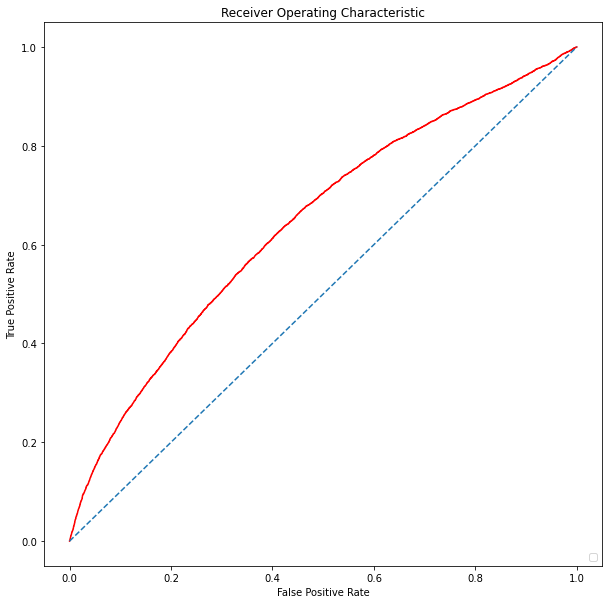

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()